
<a id='arellano'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Risco Padrão e Flutuações de Renda

## Conteúdo

- [Risco Padrão e Flutuações de Renda](#Risco-Padrão-e-Flutuações-de-Renda)  
  - [Resumo](#Resumo)  
  - [Estrutura](#Estrutura)  
  - [Equilíbrio](#Equilíbrio)  
  - [Computação](#Computação)  
  - [Resultados](#Resultados)  
  - [Exercícios](#Exercícios)  
  - [Soluções](#Soluções)  

> *Devidamente traduzido, revisado e adaptado do [QuantEcon](https://julia.quantecon.org/) pelos bolsistas CNPq Pedro Luiz H. Furtado e Jonas Aragão M. Corpes, sob a supervisão do Prof. Christiano Penna, do CAEN/UFC.*

## Resumo

Esta aula calcula versões do modelo de Arellano [Ar08](https://julia.quantecon.org/../zreferences.html#arellano2008default) de padrão soberano.

O modelo descreve interações entre risco de inadimplência (ou default), produto e uma taxa de juros de equilíbrio que inclui um prêmio pelo risco de inadimplência endógeno.

O tomador de decisão é um governo de uma pequena economia aberta que toma empréstimos de credores estrangeiros neutros ao risco.

Os credores estrangeiros devem ser compensados ​​pelo risco de inadimplência.

O governo toma emprestado e empresta no exterior para facilitar o consumo de seus cidadãos.

O governo paga sua dívida apenas se assim o desejar, mas recusar o pagamento tem consequências adversas.

A taxa de juros da dívida do governo se ajusta em resposta à probabilidade de inadimplência dependente do estado escolhida pelo governo.

O modelo produz resultados que ajudam a interpretar experiências de default soberano, incluindo

- Taxas de juros contracíclicas da dívida soberana;
- Saldos comerciais contracíclicos, e
- Alta volatilidade do consumo em relação à produção.


Notavelmente, longas recessões causadas por maus resultados no processo de renda aumentam o incentivo do governo à inadimplência.

Isso pode levar a:

- Picos nas taxas de juros;
- Perdas temporárias de acesso aos mercados internacionais de crédito;
- Grandes quedas na produção, consumo e bem-estar, e
- Grandes saídas de capital durante recessões.


Essa dinâmica é consistente com as experiências de muitos países.

## Estrutura

Nesta seção, descrevemos os principais recursos do modelo.

### Produto, consumo e dívida

Uma pequena economia aberta é dotada de um fluxo potencial de saída estocástico e estocástico, exógeno, $ \{y_t \} $.

A produção potencial é realizada apenas em períodos em que o governo honra sua dívida soberana.

O produto final pode ser negociado ou consumido.

A sequência $ \{y_t \} $ é descrita por um processo de Markov com densidade estocástica do kernel $ p (y, y ') $.

As famílias no país são idênticas e classificam os fluxos estocásticos de consumo de acordo com


<a id='equation-utility'></a>
$$
\mathbb E \sum_{t=0}^{\infty} \beta^t u(c_t) \tag{1}
$$

Aqui

- $ 0 < \beta < 1 $ é um fator de desconto temporal.  
- $ u $ é uma função de utilidade crescente e estritamente côncava.  


As seqüências de consumo usufruídas pelas famílias são afetadas pela decisão do governo de emprestar ou emprestar internacionalmente.

O governo é benevolente no sentido de que seu objetivo é maximizar [(1)](#equation-utility).

O governo é o único ator doméstico com acesso ao crédito estrangeiro.

Como as famílias são avessas às flutuações do consumo, o governo tentará suavizar o consumo emprestando (e emprestando a) credores estrangeiros.

### Mercado de ativos

O único instrumento de crédito disponível para o governo é um título de um período negociado em mercados internacionais de crédito.

O mercado de títulos possui os seguintes recursos

- O título vence em um período e não é contingente do estado.
- Uma compra de um título com valor nominal $ B '$ é uma reivindicação de $ B' $ unidades da
   bom consumo no próximo período.
- Comprar $ B '$ no próximo período custa agora $ q B' $ ou, o que é equivalente.
- Para vender unidades de $ -B '$ dos produtos do próximo período, o vendedor ganha $ - q B' $ dos produtos de hoje
  
   - se $ B '<0 $, as unidades do bem $ -q B' $ são recebidas no período atual, com a promessa de reembolsar as unidades $ -B '$ no próximo período
   - existe uma função de preço de equilíbrio $ q (B ', y) $ que faz com que $ q $ dependa de $ B' $ e $ y $
  


Os ganhos na carteira do governo são distribuídos (ou, se negativos, tributados) pelo montante fixo às famílias.

Quando o governo não é excluído dos mercados financeiros, a restrição orçamentária nacional de um período é:


<a id='equation-resource'></a>
$$
c = y + B - q(B', y) B' \tag{2}
$$

Aqui e abaixo, um primo indica um valor do próximo período ou uma reivindicação com vencimento no próximo período.

Para descartar esquemas Ponzi, também exigimos que $ B \geq -Z $ em todos os períodos.

- $ Z $ é escolhido para ser suficientemente grande para que a restrição nunca se ligue em equilíbrio.  

### Mercado financeiro

Credores estrangeiros

- São neutros ao risco;
- conheça o processo estocástico da produção doméstica $ \{y_t \} $ e observe $ y_t, y_ {t-1}, \ldots, $ no momento $ t $;
- Pode emprestar ou emprestar sem limite em um mercado internacional de crédito a uma taxa de juros internacional constante $ r $;
- Receber pagamento integral se o governo optar por pagar, e
- Receber zero se o governo deixar de pagar sua dívida de um período devido.


Quando se espera que um governo adote o próximo período com probabilidade $ \delta $, o valor esperado de uma promessa de pagamento de uma unidade de consumo no próximo período é $ 1 - \delta $.

Portanto, o valor esperado descontado de uma promessa de pagar $ B $ no próximo período é


<a id='equation-epc'></a>
$$
q = \frac{1 - \delta}{1 + r} \tag{3}
$$

A seguir, mostramos como o governo escolhe a probabilidade padrão $ \delta $.

### Decisões governamentais

A cada momento $ t $, o governo escolhe entre

1. Inadimplência
2. Cumprir suas obrigações atuais e comprar ou vender uma quantidade ideal de dívida soberana de um período


Inadimplência significa recusar-se a pagar todas as suas obrigações atuais.

Se o governo não cumprir o padrão no período atual, o consumo será igual à produção atual.

Mas um calote soberano tem duas consequências:

1. A produção cai imediatamente de $ y $ para $ h (y) $, onde $ 0 \leq h (y) \leq y $
  
   - retorna a $ y $ somente após o país recuperar o acesso aos mercados de crédito internacionais.
  
2. O país perde o acesso aos mercados de crédito estrangeiros.  

### Reentrada no mercado internacional de crédito

Enquanto em um estado de inadimplência, a economia recupera o acesso a
crédito estrangeiro em cada período subsequente com probabilidade
$ \theta $.

## Equilíbrio

Informalmente, um equilíbrio é uma sequência de taxas de juros sobre sua dívida soberana, uma sequência estocástica de decisões de inadimplência do governo e um fluxo implícito de consumo das famílias, de modo que

1. Consumo e ativos atendem à restrição orçamentária nacional.
2. O governo maximiza a utilidade doméstica levando em consideração
  - a restrição de recursos
  - o efeito de suas escolhas no preço dos títulos
  - conseqüências da inadimplência agora para o futuro produto líquido e futuras oportunidades de empréstimos e empréstimos
3. A taxa de juros da dívida do governo inclui um prêmio de risco suficiente para fazer com que os credores estrangeiros esperem, em média, obter a taxa de juros internacional constante e livre de risco.


Para expressar essas idéias com mais precisão, considere primeiro as opções do
governo que

1. Entra em um período com ativos iniciais $ B $, ou o que é a mesma coisa, dívida inicial a ser paga agora de $ -B $
2. Observa a produção atual $ y $ e
3. Escolhe um
  
  1. Pagar o calote, ou
  2. Pagar $ -B $ e definir a dívida do próximo período devido a $ -B '$
  


Em uma formulação recursiva,

- Variáveis ​​de estado para o governo compreendem o par $ (B, y) $;
- $ v (B, y) $ é o valor ideal do problema do governo quando, no início de um período, ele enfrenta a escolha de honrar ou não;
- $ v_c (B, y) $ é o valor da escolha de pagar as obrigações que vencem, e
- $ v_d (y) $ é o valor de escolher o padrão.


$ v_d (y) $ não depende de $ B $ porque, quando o acesso ao crédito é recuperado, os ativos estrangeiros líquidos são iguais a $ 0 $.

Expressado recursivamente, o valor da inadimplência é

$$
v_d(y) = u(h(y)) +
    \beta \int \left\{
            \theta v(0, y') + (1 - \theta) v_d(y')
            \right\}
            p(y, y') dy'
$$

O valor do pagamento é

$$
v_c(B, y) = \max_{B' \geq -Z}
       \left\{
            u(y - q(B', y) B' + B) +
            \beta \int v(B', y') p(y, y') dy'
      \right\}
$$

As três funções de valor estão ligadas por

$$
v(B, y) = \max\{ v_c(B, y), v_d(y) \}
$$

O governo escolhe o calote quando

$$
v_c(B, y) < v_d(y)
$$

e, portanto, dado $ B '$, a probabilidade de inadimplência no próximo período é


<a id='equation-delta'></a>
$$
\delta(B', y) := \int \mathbb 1\{v_c(B', y') < v_d(y') \} p(y, y') dy' \tag{4}
$$

Dado lucro zero para credores estrangeiros em equilíbrio, podemos combinar [(3)](#equação-epc) e [(4)](#equação-delta) para determinar a função de preço do título:


<a id='equation-bondprice'></a>
$$
q(B', y) = \frac{1 - \delta(B', y)}{1 + r} \tag{5}
$$

### Definição de equilíbrio

Um *equilíbrio* é

- Uma função de precificação $ q (B ', y) $;
- Um triplo de funções de valor $ (v_c (B, y), v_d (y), v (B, y)) $;
- Uma regra de decisão informando ao governo quando inadimplir e quando pagar em função do estado $ (B, y) $, e
- Uma regra de acumulação de ativos que, dependendo da opção de não usar o padrão, mapeia $ (B, y) $ para $ B '$


de tal modo que

- As três equações de Bellman para $ (v_c (B, y), v_d (y), v (B, y)) $ são satisfeitas.
- Dada a função de preço $ q (B ', y) $, a regra de decisão padrão e a regra de decisão de acumulação de ativos atingem a função de valor ideal $ v (B, y) $, e
- A função de preço $ q (B ', y) $ satisfaz a equação [(5)](#equation-bondprice).  

## Computação

Vamos agora calcular um equilíbrio do modelo de Arellano.

Os objetos de equilíbrio são a função de valor $ v (B, y) $, a regra de decisão padrão associada e a função de precificação $ q (B ', y) $.

Usaremos nosso código para replicar os resultados de Arellano.

Depois disso, realizaremos algumas simulações adicionais.

Ele usa uma versão ligeiramente modificada do algoritmo recomendado por Arellano.

- O apêndice de [Are08](https://julia.quantecon.org/../zreferences.html#arellano2008default) recomenda
  iteração da função value até convergência, atualizando o preço e depois repetindo.
- Em vez disso, atualizamos o preço do título a cada etapa da iteração da função de valor.


A segunda abordagem é mais rápida e os dois procedimentos diferentes oferecem resultados muito semelhantes.

Aqui está uma descrição mais detalhada do nosso algoritmo:

1. Adivinhe uma função de valor $ v (B, y) $ e função de preço $ q (B ', y) $.
2. Em cada par $ (B, y) $,
  - atualize o valor padrão de $ v_d (y) $
  - atualize o valor da continuação $ v_c (B, y) $
3. Atualize a função de valor v (B, y), a regra padrão, a probabilidade implícita ex ante implícita e a função preço.
4. Verifique se há convergência. Se convergido, pare. Caso contrário, vá para o passo 2.


Utilizamos discretização simples em uma grade de ativos e níveis de renda.

O processo de saída é discreto usando o [método de quadratura de Tauchen](https://github.com/QuantEcon/QuantEcon.jl/blob/master/src/markov/markov_approx.jl).

O código pode ser encontrado abaixo:

(os resultados e a discussão seguem o código)

### Configuração

In [1]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.4.0")

In [2]:
using LinearAlgebra, Statistics
using Parameters, QuantEcon, DataFrames, Plots, Random

In [3]:
function ArellanoEconomy(;β = .953,
                          γ = 2.,
                          r = 0.017,
                          ρ = 0.945,
                          η = 0.025,
                          θ = 0.282,
                          ny = 21,
                          nB = 251)

    # criar grades
    Bgrid = collect(range(-.4, .4, length = nB))
    mc = tauchen(ny, ρ, η)
    Π = mc.p
    ygrid = exp.(mc.state_values)
    ydefgrid = min.(.969 * mean(ygrid), ygrid)

     # definir funções de valor
     # aviso solicitado diferente do Python para levar
     # vantagem do layout principal da coluna de Julia    
    vf = zeros(nB, ny)
    vd = zeros(1, ny)
    vc = zeros(nB, ny)
    policy = zeros(nB, ny)
    q = ones(nB, ny) .* (1 / (1 + r))
    defprob = zeros(nB, ny)

    return (β = β, γ = γ, r = r, ρ = ρ, η = η, θ = θ, ny = ny,
            nB = nB, ygrid = ygrid, ydefgrid = ydefgrid,
            Bgrid = Bgrid, Π = Π, vf = vf, vd = vd, vc = vc,
            policy = policy, q = q, defprob = defprob)
end

u(ae, c) = c^(1 - ae.γ) / (1 - ae.γ)

function one_step_update!(ae,
                          EV,
                          EVd,
                          EVc)

    # desempacotar coisas
    @unpack β, γ, r, ρ, η, θ, ny, nB = ae
    @unpack ygrid, ydefgrid, Bgrid, Π, vf, vd, vc, policy, q, defprob = ae
    zero_ind = searchsortedfirst(Bgrid, 0.)

    for iy in 1:ny
        y = ae.ygrid[iy]
        ydef = ae.ydefgrid[iy]

        # valor de estar inadimplente com renda y
        defval = u(ae, ydef) + β * (θ * EVc[zero_ind, iy] + (1-θ) * EVd[1, iy])
        ae.vd[1, iy] = defval

        for ib in 1:nB
            B = ae.Bgrid[ib]

            current_max = -1e14
            pol_ind = 0
            for ib_next=1:nB
                c = max(y - ae.q[ib_next, iy]*Bgrid[ib_next] + B, 1e-14)
                m = u(ae, c) + β * EV[ib_next, iy]

                if m > current_max
                    current_max = m
                    pol_ind = ib_next
                end

            end

            # atualizar funções de política e valor
            ae.vc[ib, iy] = current_max
            ae.policy[ib, iy] = pol_ind
            ae.vf[ib, iy] = defval > current_max ? defval : current_max
        end
    end
end

function compute_prices!(ae)
    # desempacotar parâmetros
    @unpack β, γ, r, ρ, η, θ, ny, nB = ae

    # crie valores padrão com um tamanho correspondente
    vd_compat = repeat(ae.vd, nB)
    default_states = vd_compat .> ae.vc

    # atualizar probabilidades de calote e preços
    copyto!(ae.defprob, default_states * ae.Π')
    copyto!(ae.q, (1 .- ae.defprob) / (1 + r))
    return
end

function vfi!(ae; tol = 1e-8, maxit = 10000)

    # desempacotar coisas
    @unpack β, γ, r, ρ, η, θ, ny, nB = ae
    @unpack ygrid, ydefgrid, Bgrid, Π, vf, vd, vc, policy, q, defprob = ae
    Πt = Π'

    # iteração das coisas
    it = 0
    dist = 10.

    # memória alocada para atualização
    V_upd = similar(ae.vf)

    while dist > tol && it < maxit
        it += 1

       # calcular expectativas para essas iterações
       # (precisamos de Π devido às dimensões da função do valor do pedido)
        copyto!(V_upd, ae.vf)
        EV = ae.vf * Πt
        EVd = ae.vd * Πt
        EVc = ae.vc * Πt

        # atualizar função alor
        one_step_update!(ae, EV, EVd, EVc)

        # atualizar preços
        compute_prices!(ae)

        dist = maximum(abs(x - y) for (x, y) in zip(V_upd, ae.vf))

        if it % 25 == 0
            println("Finished iteration $(it) with dist of $(dist)")
        end
    end
end

function QuantEcon.simulate(ae,
                            capT = 5000;
                            y_init = mean(ae.ygrid),
                            B_init = mean(ae.Bgrid),
                            )

    # obter índices iniciais
    zero_index = searchsortedfirst(ae.Bgrid, 0.)
    y_init_ind = searchsortedfirst(ae.ygrid, y_init)
    B_init_ind = searchsortedfirst(ae.Bgrid, B_init)

    # criar uma cadeia de Markov QE
    mc = MarkovChain(ae.Π)
    y_sim_indices = simulate(mc, capT + 1; init = y_init_ind)

    # alocar e filtrar o produto
    y_sim_val = zeros(capT+1)
    B_sim_val, q_sim_val = similar(y_sim_val), similar(y_sim_val)
    B_sim_indices = fill(0, capT + 1)
    default_status = fill(false, capT + 1)
    B_sim_indices[1], default_status[1] = B_init_ind, false
    y_sim_val[1], B_sim_val[1] = ae.ygrid[y_init_ind], ae.Bgrid[B_init_ind]

    for t in 1:capT
        # obter os índices de hoje
        yi, Bi = y_sim_indices[t], B_sim_indices[t]
        defstat = default_status[t]

        # se você não estiver inadimplente
        if !defstat
            default_today = ae.vc[Bi, yi] < ae.vd[yi]

            if default_today
                # valores da inadimplência
                default_status[t] = true
                default_status[t + 1] = true
                y_sim_val[t] = ae.ydefgrid[y_sim_indices[t]]
                B_sim_indices[t + 1] = zero_index
                B_sim_val[t+1] = 0.
                q_sim_val[t] = ae.q[zero_index, y_sim_indices[t]]
            else
                default_status[t] = false
                y_sim_val[t] = ae.ygrid[y_sim_indices[t]]
                B_sim_indices[t + 1] = ae.policy[Bi, yi]
                B_sim_val[t + 1] = ae.Bgrid[B_sim_indices[t + 1]]
                q_sim_val[t] = ae.q[B_sim_indices[t + 1], y_sim_indices[t]]
            end

        # se você estiver inadimplente
        else
            B_sim_indices[t + 1] = zero_index
            B_sim_val[t+1] = 0.
            y_sim_val[t] = ae.ydefgrid[y_sim_indices[t]]
            q_sim_val[t] = ae.q[zero_index, y_sim_indices[t]]

            # com probabilidade θ de sair do status de inadimplente
            default_status[t + 1] = rand() ≥ ae.θ
        end
    end

    return (y_sim_val[1:capT], B_sim_val[1:capT], q_sim_val[1:capT],
            default_status[1:capT])
end

## Resultados

Vamos começar tentando replicar os resultados obtidos em [Are08](https://julia.quantecon.org/../zreferences.html#arellano2008default).

A seguir, todos os resultados são calculados usando os valores dos parâmetros de Arellano.

Os valores podem ser vistos na função ArellanoEconomy mostrada acima.

- Por exemplo, r = 0,017 corresponde à taxa média trimestral em um tesouro dos EUA de 5 anos
   no período 1983-2001.


Detalhes sobre como calcular os números são relatados como soluções para os exercícios.

A primeira figura mostra a tabela de preços dos títulos e replica a Figura 3 de Arellano, onde $ y_L $ e $ Y_H $ são particularmente abaixo dos valores médios e acima da média da produção $ y $

![1](https://github.com/pluiz30/Julia-Hub/assets/60633407/6bf295cb-57d3-40a1-b3ba-697a93854980)
  
- $ y_L $ está 5% abaixo da média dos valores da grade de $ y $
- $ y_H $ está 5% acima da média dos valores da grade $ y $  


A grade usada para calcular esse número era relativamente grossa (ny, nB = 21, 251) para corresponder às descobertas de Arrelano.



Aqui estão os mesmos relacionamentos calculados em uma grade mais fina (ny, nB = 51, 551)

![2](https://github.com/pluiz30/Julia-Hub/assets/60633407/1cd3af4c-96c7-417a-a093-4e47d2527f09)

  
Nos dois casos, a figura mostra que:

- Níveis mais altos de dívida (maior $ -B '$) induzem maiores descontos no valor nominal, que correspondem a taxas de juros mais altas.
- Renda mais baixa também causa mais descontos, pois os credores estrangeiros antecipam uma maior probabilidade de inadimplência.


A próxima figura plota funções de valor e replica o painel direito da Figura 4 de [Are08](https://julia.quantecon.org/../zreferences.html#arellano2008default)


![3](https://github.com/pluiz30/Julia-Hub/assets/60633407/478372d3-f139-45a1-b316-28c7f5acb1b3)

  
Podemos usar os resultados da computação para estudar a probabilidade padrão
$ \delta (B ', y) $ definido em [(4)](#equation-delta).



O próximo gráfico mostra essas probabilidades padrão acima de $ (B ', y) $ expressas em um mapa de calor:


![4](https://github.com/pluiz30/Julia-Hub/assets/60633407/66254c88-4123-4268-bc01-a0fac437ddfa)

  
Conforme previsto, a probabilidade de o governo optar por não cumprir o
O período seguinte aumenta com o endividamento e cai com o rendimento.



Em seguida, vamos executar uma simulação de série temporal de $ \{y_t \} $, $ \{B_t \} $ e $ q (B_ {t + 1}, y_t) $.

As barras verticais cinza correspondem a períodos em que a economia é excluída dos mercados financeiros devido a uma inadimplência passada:

![5](https://github.com/pluiz30/Julia-Hub/assets/60633407/bc9c236b-a4ac-4c62-a434-fa40c2c134d2)
  
Uma característica notável dos dados simulados é a resposta não linear das taxas de juros.


Períodos de relativa estabilidade são seguidos por picos acentuados na taxa de desconto da dívida pública.

## Exercícios


<a id='arellano-ex1'></a>

### Exercício 1

Na medida do possível, replique as figuras mostradas acima.

- Use os valores dos parâmetros listados como padrões na função ArellanoEconomy.
- As séries cronológicas variam, é claro, de acordo com os choques.  

## Soluções

In [4]:
using DataFrames, Plots
gr(fmt=:png);

Calcule a função de valor, política e preços de equilíbrio.

In [5]:
ae = ArellanoEconomy(β = .953,     # taxa de desconto temporal
                     γ = 2.,       # aversão ao risco
                     r = 0.017,    # taxa internacional de juros
                     ρ = .945,     # persistência no produto
                     η = 0.025,    # desvio padrão do choque de insumos
                     θ = 0.282,    # prob de recuperar o acesso
                     ny = 21,      # número de pontos na grade y
                     nB = 251)     # número de pontos na grade B

# agora resolve-se o modelo na grade
vfi!(ae)

Finished iteration 25 with dist of 0.3424484168091375
Finished iteration 50 with dist of 0.09820394074288075
Finished iteration 75 with dist of 0.02915866229151476
Finished iteration 100 with dist of 0.008729266837651295
Finished iteration 125 with dist of 0.002618400938121823
Finished iteration 150 with dist of 0.0007857709211727126
Finished iteration 175 with dist of 0.00023583246008485048
Finished iteration 200 with dist of 7.078195654131036e-5
Finished iteration 225 with dist of 2.1244388765495614e-5
Finished iteration 250 with dist of 6.376267926100354e-6
Finished iteration 275 with dist of 1.913766855210497e-6
Finished iteration 300 with dist of 5.743961786208729e-7
Finished iteration 325 with dist of 1.723987352875156e-7
Finished iteration 350 with dist of 5.174360495630026e-8
Finished iteration 375 with dist of 1.5530289942944364e-8


Calcular o cronograma de preços dos títulos, como visto na figura 3 de Arellano (2008).

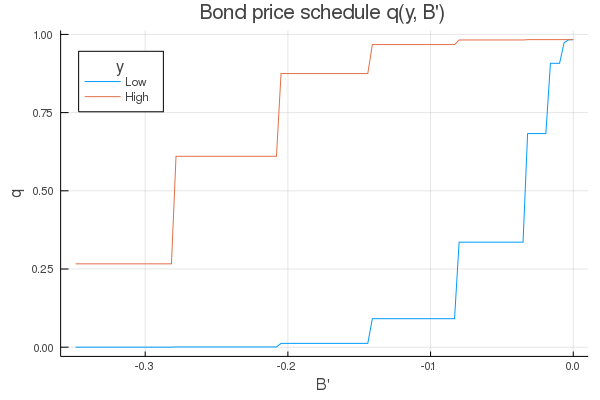

In [6]:
# criar os valores "Y High" e "Y Low" com desvio de 5% da média
high, low = 1.05 * mean(ae.ygrid), 0.95 * mean(ae.ygrid)
iy_high, iy_low = map(x -> searchsortedfirst(ae.ygrid, x), (high, low))

# extrair uma grade de plotagem adequada
x = zeros(0)
q_low = zeros(0)
q_high = zeros(0)
for i in 1:ae.nB
    b = ae.Bgrid[i]
    if -0.35 ≤ b ≤ 0  # coincidir com a fig. 3 de Arellano
        push!(x, b)
        push!(q_low, ae.q[i, iy_low])
        push!(q_high, ae.q[i, iy_high])
    end
end

# gerar o plot
plot(x, q_low, label = "Low")
plot!(x, q_high, label = "High")
plot!(title = "Bond price schedule q(y, B')",
      xlabel = "B'", ylabel = "q", legend_title = "y", legend = :topleft)

Desenhe um gráfico das funções de valor.

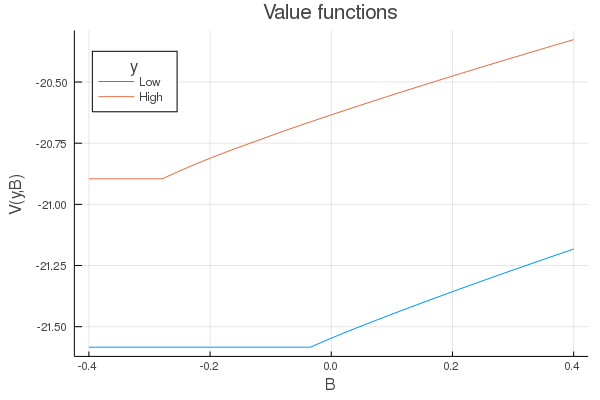

In [7]:
plot(ae.Bgrid, ae.vf[:, iy_low], label = "Low")
plot!(ae.Bgrid, ae.vf[:, iy_high], label = "High")
plot!(xlabel = "B", ylabel = "V(y,B)", title = "Value functions",
      legend_title="y", legend = :topleft)

Desenhe um mapa de calor para a probabilidade de calote.

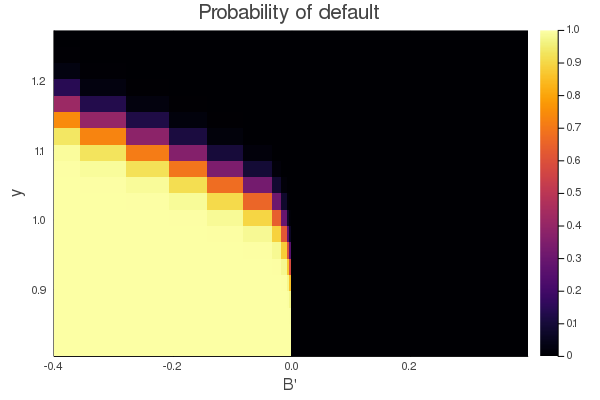

┌ Warning: GR: heatmap only supported with equally spaced data.
└ @ Plots /home/ubuntu/.julia/packages/Plots/Iuc9S/src/backends/gr.jl:945


In [8]:
plot(seriestype = :heatmap, ae.Bgrid[1:end-1],
      ae.ygrid[2:end],
      clamp.(vec(ae.defprob[1:end - 1, 1:end - 1]), 0, 1))
plot!(xlabel = "B'", ylabel = "y", title = "Probability of default",
      legend = :topleft)

Traçe uma série temporal das principais variáveis simuladas a partir do modelo.

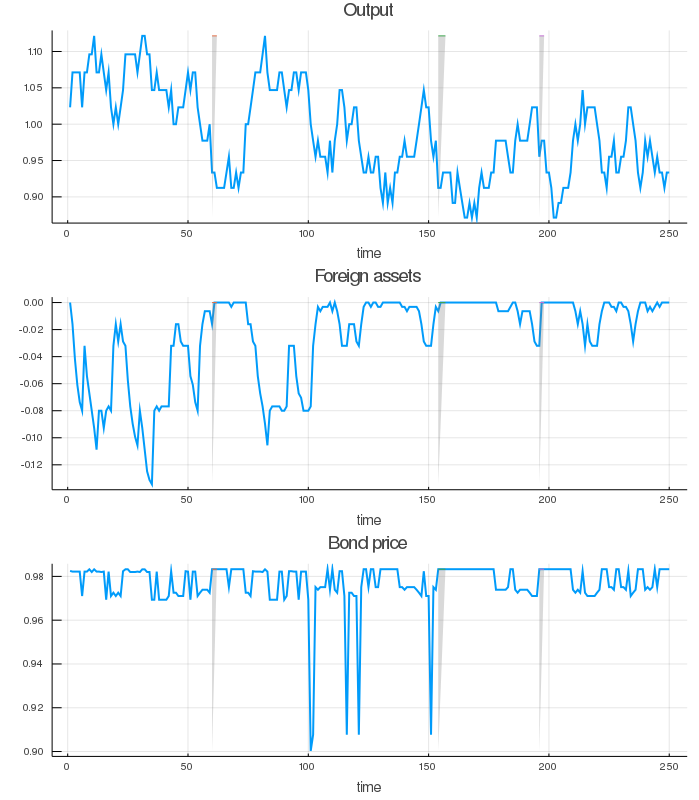

In [9]:
using Random
# definir semente aleatória para obter resultados consistentes
Random.seed!(348938)

# simular
T = 250
y_vec, B_vec, q_vec, default_vec = simulate(ae, T)

# encontre períodos iniciais e finais de recessões
defs = findall(default_vec)
def_breaks = diff(defs) .> 1
def_start = defs[[true; def_breaks]]
def_end = defs[[def_breaks; true]]

y_vals = [y_vec, B_vec, q_vec]
titles = ["Output", "Foreign assets", "Bond price"]

plots = plot(layout = (3, 1), size = (700, 800))

# Plote as três variáveis e, para cada variável, sombreando o (s) período (s) padrão
# em cinza
for i in 1:3
    plot!(plots[i], 1:T, y_vals[i], title = titles[i], xlabel = "time", label = "", lw = 2)
    for j in 1:length(def_start)
        plot!(plots[i], [def_start[j], def_end[j]], fill(maximum(y_vals[i]), 2),
              fillrange = [extrema(y_vals[i])...], fcolor = :grey, falpha = 0.3, label = "")
    end
end

plot(plots)